<div>
    <div style="float:left;width:50%;text-align:center">
        <h1>pyGIMLi tutorial @ EASYGO Training Week</h1>
<a href="https://www.pygimli.org/documentation.html">https://www.pygimli.org/documentation.html</a>
    </div>
    <div style="float:right;width:30%">
        <img src="https://www.pygimli.org/_images/pg_logo.png" alt="pyGIMLi logo">
    </div>
</div>

---
# The equation level - Modeling the steady-state heat equation
## Objective
1. Using the previously created mesh and populate it with a property
1. Solve a Poisson type equation with Finite Elements
1. Visualize the results
1. Interpolate results to other meshes or lines

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("seaborn-notebook")
%config InlineBackend.figure_format='svg'
import pygimli as pg
from pygimli.viewer import showMesh

## Loading the mesh
We load the mesh that has been previously generated in notebook 1 (mesh generation).

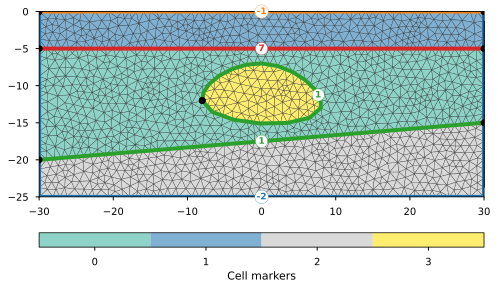

In [2]:
mesh = pg.load("data/mesh.bms")
showMesh(mesh, markers=True, showMesh=True);

## The equation level

Now we solve the heat equation
$$ \nabla (a \cdot \nabla T) = f $$
for the unknown temperature $T$ in dependence of a thermal diffusivity $a$ and a heat source $f$.
We solve on the mesh we created in notebook 1. The parameter $a$ needs to be known on the whole mesh. Therefore we create a map that associates an $a$ value for every model region 0-3 and have a look at it:

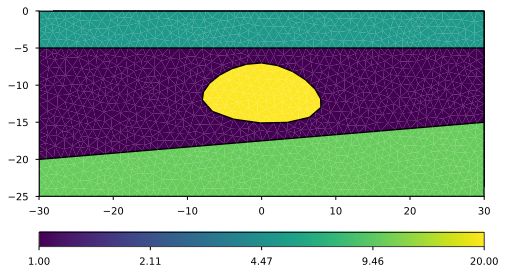

In [3]:
amap = [[0, 1.0], [1, 5.0], [2, 10.0], [3, 20.0]] #marker, value
showMesh(mesh, amap, logScale=True);

## The finite-element solver
`pg.solve` solves a partial differential equation using the function [`solveFiniteElement`](https://www.pygimli.org/pygimliapi/_generated/pygimli.solver.html?highlight=solvefiniteelement#pygimli.solver.solveFiniteElements). 

Instead of a heat source, we fix temperatures at the boundaries (bc) using Dirichlet boundary conditions.

Mesh:  Mesh: Nodes: 1369 Cells: 2597 Boundaries: 3965
Assembling time:  0.024
Solving time:  0.16900000000000004


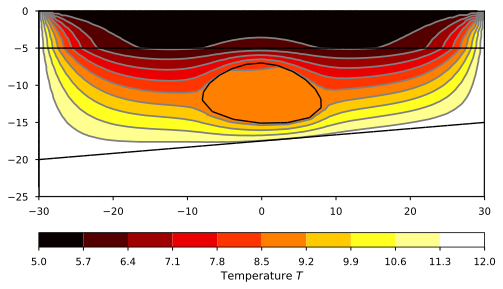

In [4]:
bc={'Dirichlet':{-1:5.0, -2:12.0}}
#bc={'Dirichlet':{-1:20.0}, 'Neumann': {-2:-0.1}}
T = pg.solve(mesh, a=amap, bc=bc, verbose=True)
showMesh(mesh, data=T, label='Temperature $T$', cMap="hot",
         nLevs=11, showBoundary=True);

We are now interested in the stream lines of the heat flow. Therefore we return the temperature axis and draw the streams on top of it with [`drawStreams`](https://www.pygimli.org/pygimliapi/_generated/pygimli.viewer.mpl.html?highlight=drawstreams#pygimli.viewer.mpl.drawStreams) . Any other MPL plots could go here.

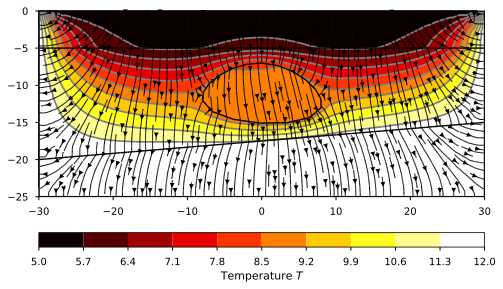

In [5]:
from pygimli.viewer.mpl import drawStreams
ax, cb = showMesh(mesh, data=T, label='Temperature $T$', cMap="hot",
                  nLevs=11, showBoundary=True);
drawStreams(ax, mesh, T)

## Interpolation
Often, results are needed on another mesh, e.g. in another software. pyGIMLi brings along interpolation that uses the Finite Element properties in the function [`interpolate`](https://www.pygimli.org/pygimliapi/_generated/pygimli.meshtools.html?highlight=interpolate#pygimli.meshtools.interpolate)

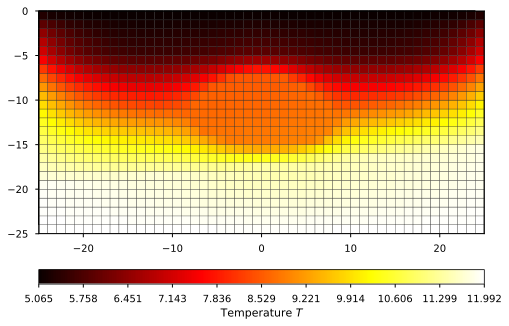

In [6]:
grid = pg.createGrid(x=np.arange(-25, 25.1), y=np.arange(-25, 0.1))
Tgrid = pg.interpolate(mesh, T, grid.cellCenters())
ax, cb = showMesh(grid, data=Tgrid, label= 'Temperature $T$', cMap="hot",
                  nLevs=11, showBoundary=True, showMesh=True);

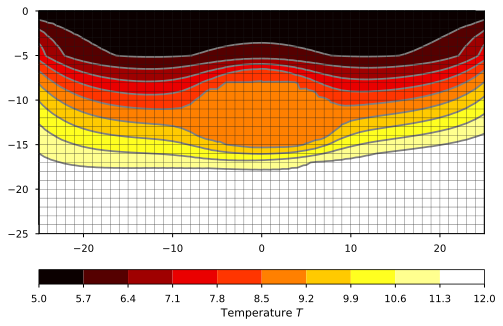

In [7]:
grid = pg.createGrid(x=np.arange(-25, 25.1), y=np.arange(-25, 0.1))
Tgrid = pg.interpolate(mesh, T, grid.positions())
ax, cb = showMesh(grid, data=Tgrid, label='Temperature $T$', cMap="hot",
                  nLevs=11, showBoundary=True, showMesh=True);

Text(0, 0.5, 'Depth')

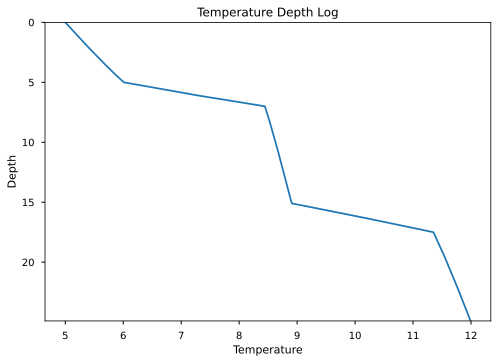

In [8]:
# produce a temperature depth log (copy)
depth = np.arange(0, 25, 0.1)
pos = [[0, -d] for d in depth]
Tlog = pg.interpolate(mesh, T, pos)
fig, ax = plt.subplots()
ax.plot(Tlog, depth)
ax.set_ylim([max(depth), 0])
ax.set_title('Temperature Depth Log')
ax.set_xlabel('Temperature')
ax.set_ylabel('Depth')